In [14]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

AttributeError: partially initialized module 'pandas' has no attribute 'core' (most likely due to a circular import)

In [7]:
import numpy as np

# Reading Data:-

In [8]:
points = pd.read_excel('BanquMisrAtmsLocation.xlsx')
points.head()

NameError: name 'pd' is not defined

In [5]:
points.shape

(4280, 5)

# Reading shapefile:-

In [8]:
df = gpd.read_file('admin/EGY_adm2.shp')
df = df[['NAME_1', 'NAME_2', 'TYPE_2', 'geometry']]
df.head()

,NAME_1,NAME_2,TYPE_2,geometry
0,Ad Daqahliyah,Aja,Markaz,"POLYGON ((31.23156 30.80004, 31.21846 30.83202..."
1,Ad Daqahliyah,Al-Jamaliyah,Kism,"POLYGON ((31.99799 31.22747, 31.98231 31.22915..."
2,Ad Daqahliyah,Al-Mansurah 1,Kism,"POLYGON ((31.37186 31.04893, 31.39912 31.05791..."
3,Ad Daqahliyah,Al-Mansurah 2\r\n,None,"POLYGON ((31.39912 31.05791, 31.41530 31.08193..."
4,Ad Daqahliyah,Al-Mansurah,Markaz,"POLYGON ((31.60274 30.99705, 31.55927 30.96840..."


In [9]:
df.isnull().sum()

NAME_1      0
NAME_2      0
TYPE_2      3
geometry    0
dtype: int64

<AxesSubplot:>

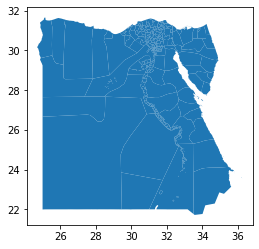

In [10]:
df['geometry'].plot()

# finding the polygon that contain each point

In [11]:
def isin(polygon, x,y):
    poly = polygon
    point = Point(y, x)
    if poly.contains(point):
        return True
    else:
        return False

In [12]:
gov = []
city = []
mk = []
long = []
lat = []
add = []
nulls = []

In [13]:
z = 0
ycnt = 0
ncnt = 0
for p in range(len(points)):
    z = 0
    for i,pol in enumerate(df['geometry'].values):
        if(isin(pol, points['Lat'][p], points['Long'][p])):
            z = 1
            ycnt += 1
            gov.append(df['NAME_1'][i])
            city.append(df['NAME_2'][i])
            mk.append(df['TYPE_2'][i])
            add.append(points['locations__card__location'][p])
            long.append(points['Long'][p])
            lat.append(points['Lat'][p])
            break
    if z == 0:
        nulls.append(p)
        ncnt += 1
        gov.append(np.nan)
        city.append(np.nan)
        mk.append(np.nan)
        long.append(np.nan)
        lat.append(np.nan)
        add.append(np.nan)

In [14]:
len(gov)

4280

In [15]:
nulls

[859, 876, 993, 1017, 1043]

In [16]:
ycnt

4275

In [17]:
ncnt

5

In [18]:
r = {}

In [19]:
res = pd.DataFrame(r)
res.head()

""


# Creating new data frame with new columns:-

In [20]:
res.insert(loc=0, column='governerate', value=gov)

In [21]:
res.insert(loc=1, column='City', value=city)
res.insert(loc=2, column='Markaz_or_qesm', value=mk)
res.insert(loc=3, column='Address', value=add)
res.insert(loc=4, column='Lat', value=lat)
res.insert(loc=5, column='Long', value=long)

In [22]:
res.head()

,governerate,City,Markaz_or_qesm,Lat,Long
0,Al Fayyum,Al-Fayyum,Markaz,29.304412,30.853546
1,Al Fayyum,Al-Fayyum,Markaz,29.319696,30.835641
2,Al Fayyum,Al-Fayyum,Markaz,29.308199,30.842229
3,Al Fayyum,Sinnuris,Markaz,29.408575,30.865073
4,Al Fayyum,Itsa,Markaz,29.236966,30.790194


In [23]:
res.shape

(4280, 5)

In [24]:
res.isnull().sum()

governerate        5
City               5
Markaz_or_qesm    31
Lat                5
Long               5
dtype: int64

## Dropping missing values

In [25]:
res.drop(index=nulls, inplace=True)

In [26]:
res.isnull().sum()

governerate        0
City               0
Markaz_or_qesm    26
Lat                0
Long               0
dtype: int64

In [27]:
len(res)

4275

In [28]:
res.to_excel('FinalResults.xlsx')